In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
df = pd.read_csv('credit card data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [72]:
df.shape

(8950, 18)

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [74]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [75]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df.MINIMUM_PAYMENTS = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1,1))[:,0]
df.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [76]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

C:\Users\SI\AppData\Local\Temp\ipykernel_11036\1995451309.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);


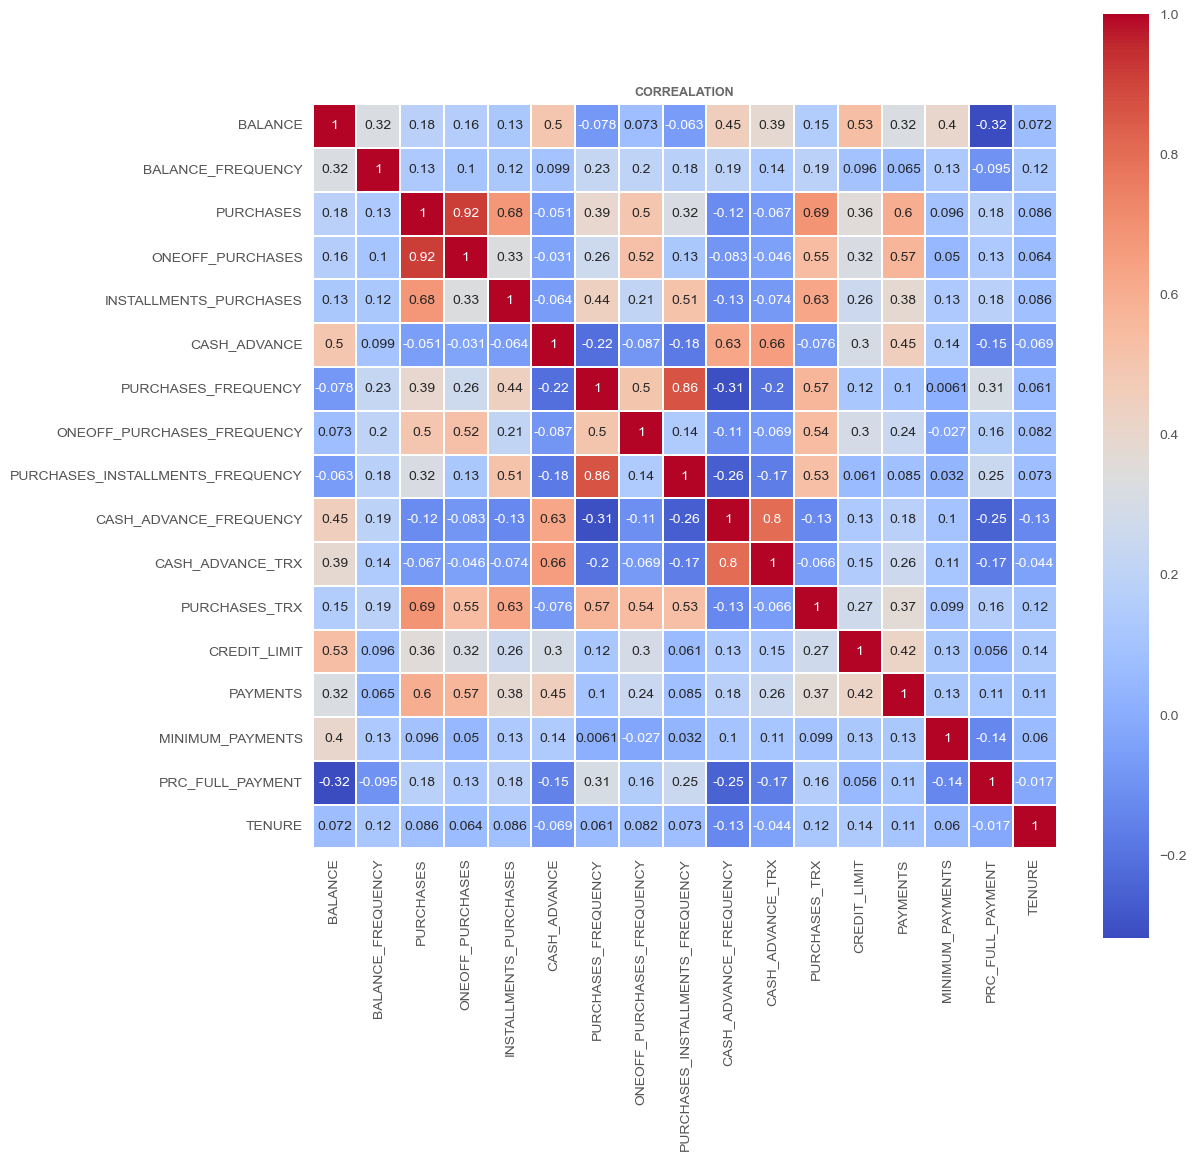

In [77]:
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORREALATION', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

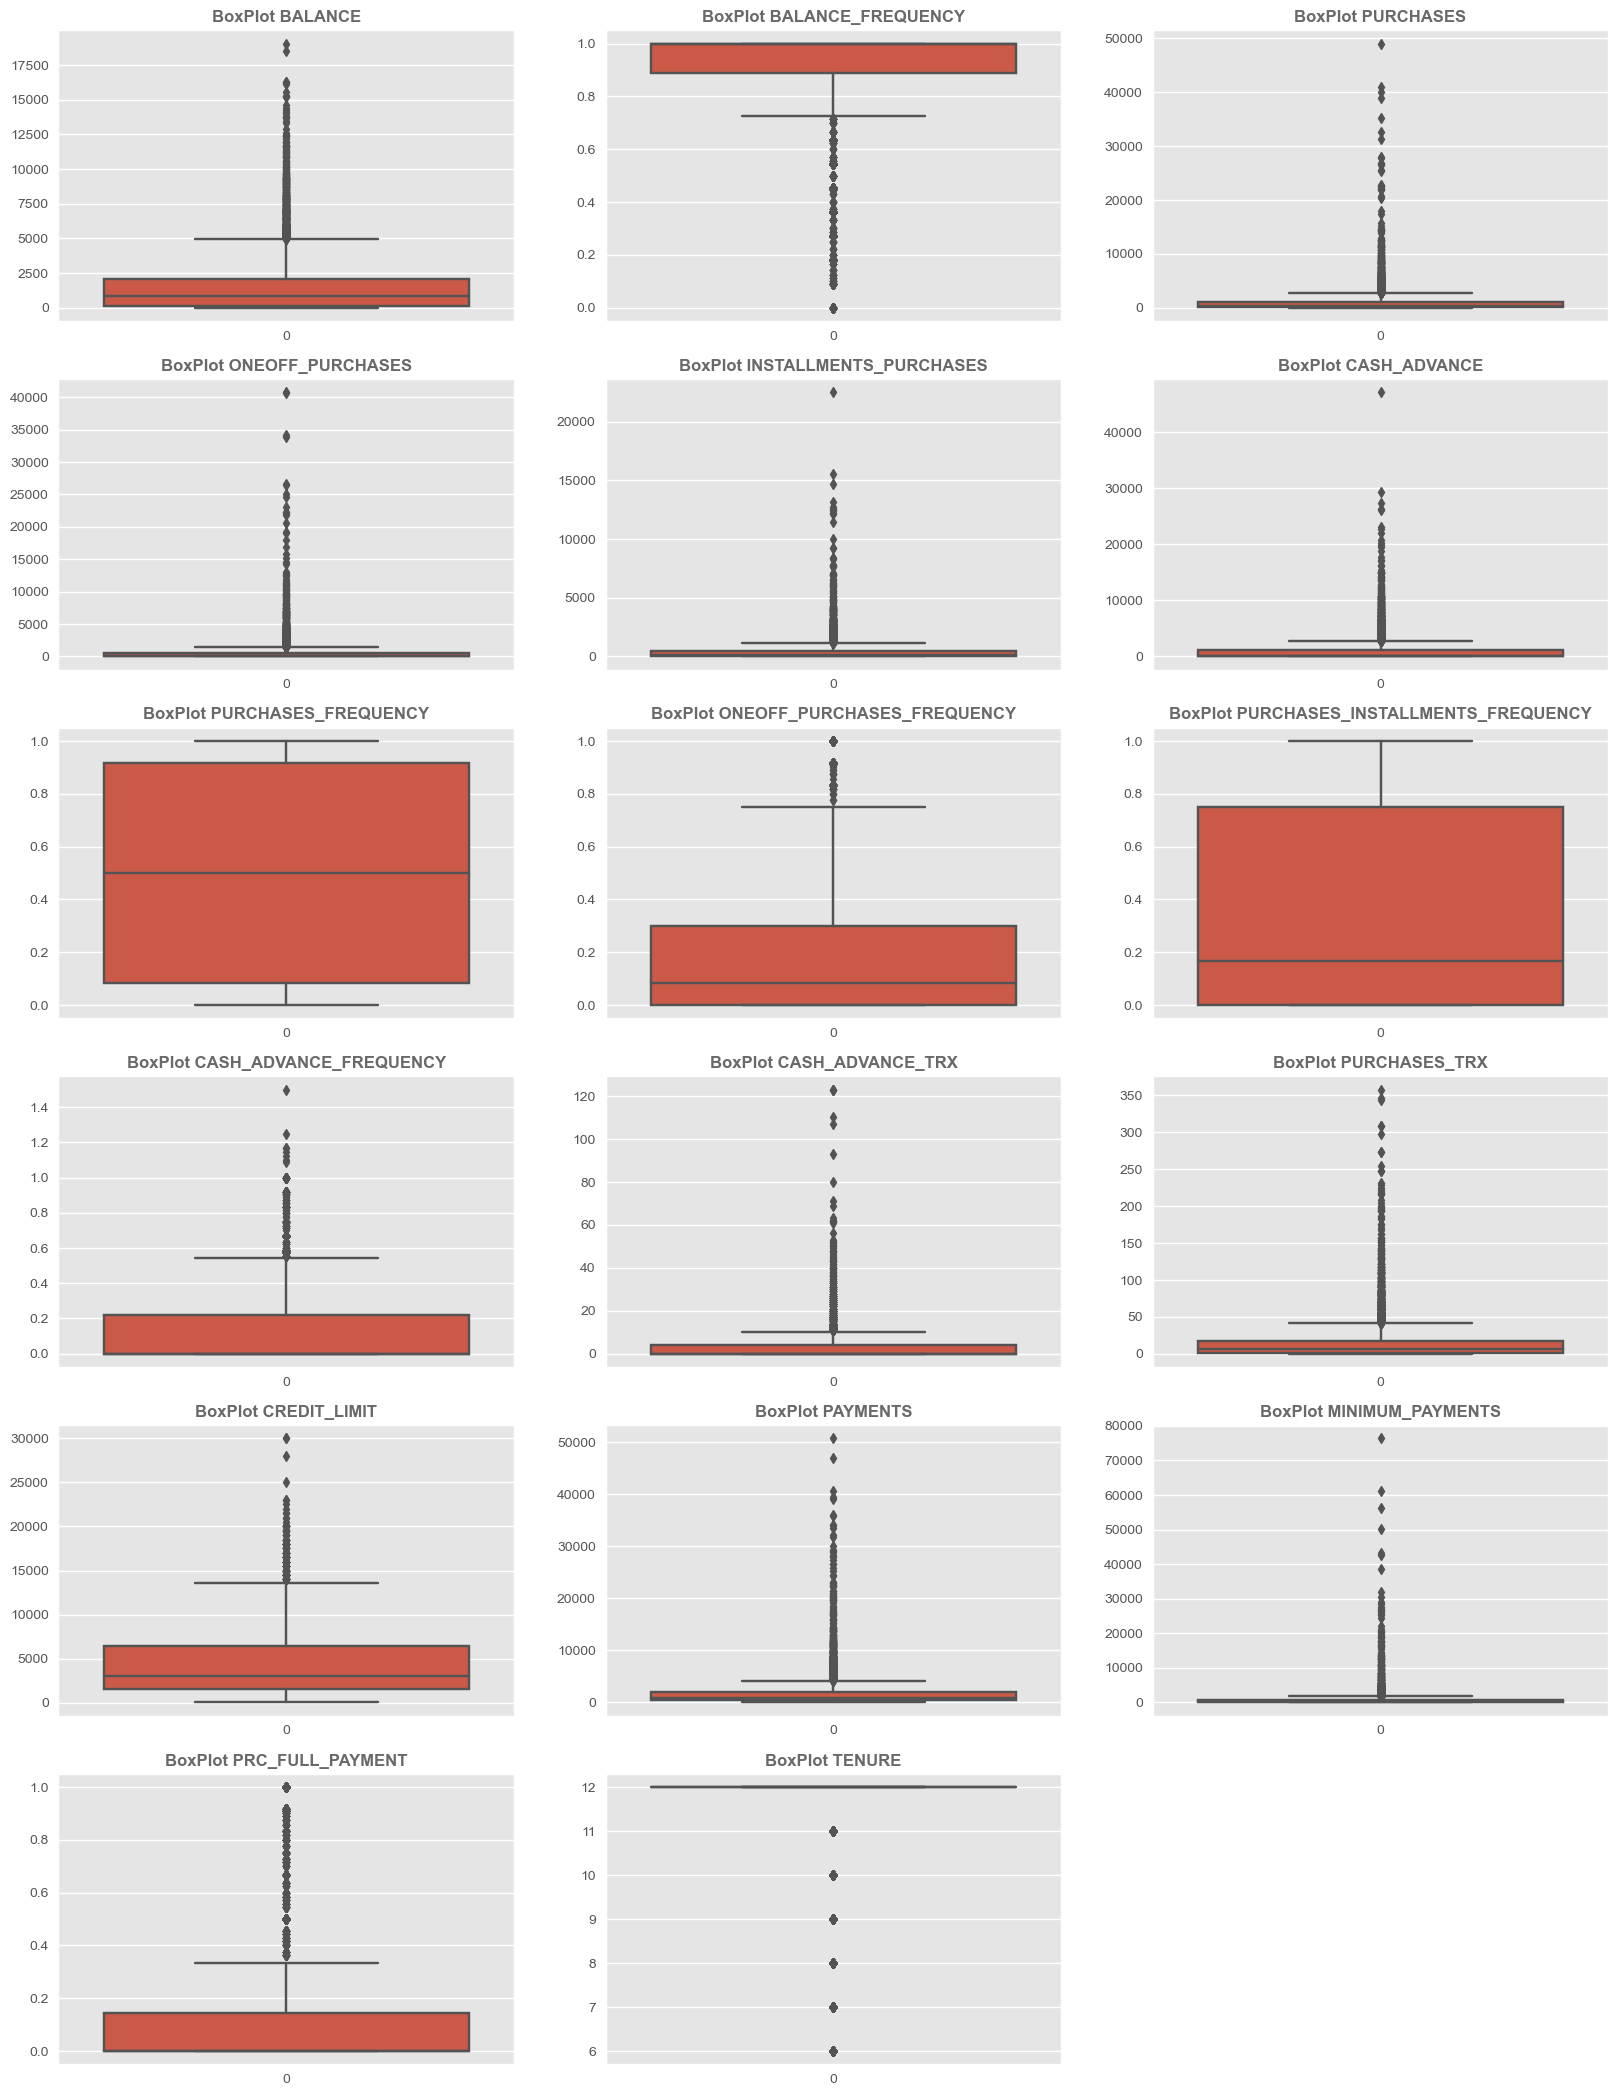

In [78]:
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

C:\Users\SI\AppData\Local\Temp\ipykernel_11036\588221109.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\SI\AppData\Local\Temp\ipykernel_11036\588221109.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\SI\AppData\Local\Temp\ipykernel_11036\5882211

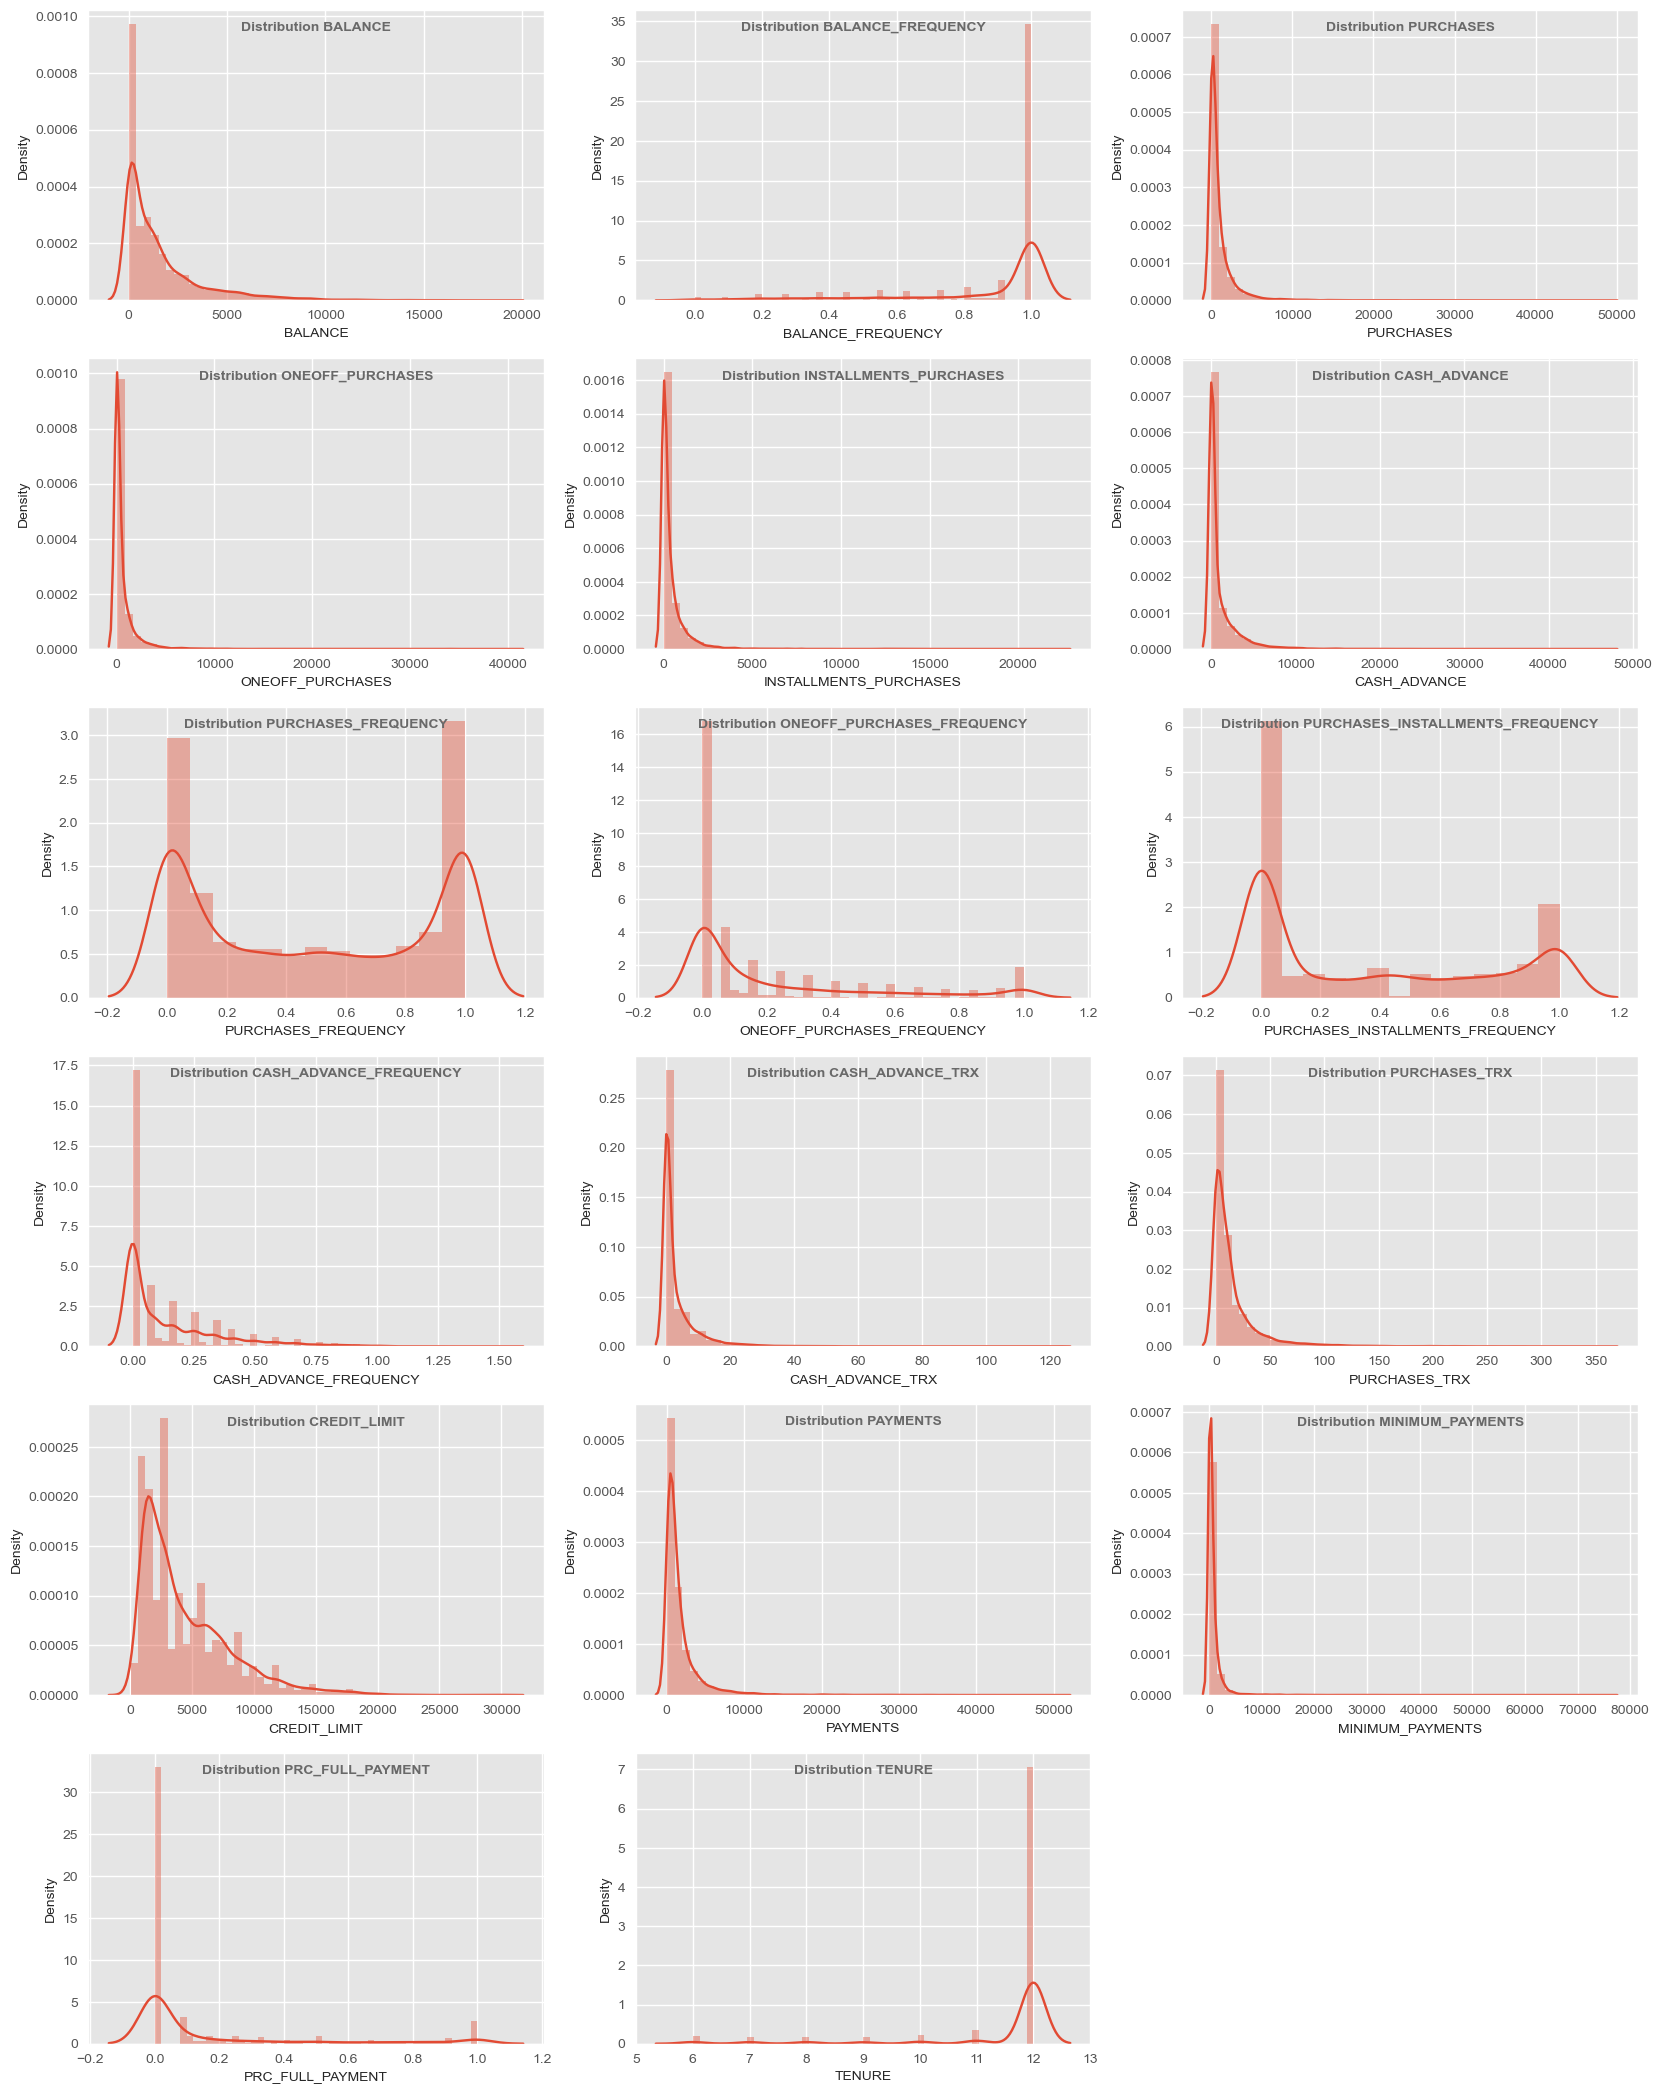

In [79]:
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

In [80]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [81]:
cols_norm = df.columns
cols_norm
# Copy of DataFrame
df_norm = df.copy()
# Creation of the normalizer
norm = MinMaxScaler() 
# Apply the normalization
df_norm[cols_norm] = norm.fit_transform(df[cols_norm])
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,0.082163,0.109309,0.0,0.006741,0.045879,0.107880,1.0
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8949.0,0.020459,0.043572,0.0,0.000812,0.007371,0.022638,1.0
ONEOFF_PURCHASES,8949.0,0.014536,0.040724,0.0,0.000000,0.000932,0.014176,1.0
INSTALLMENTS_PURCHASES,8949.0,0.018272,0.040195,0.0,0.000000,0.003956,0.020829,1.0
CASH_ADVANCE,8949.0,0.020768,0.044493,0.0,0.000000,0.000000,0.023630,1.0
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8949.0,0.090094,0.133422,0.0,0.000000,0.000000,0.148148,1.0


In [82]:
pca = PCA()

# Apply the PCA
df_pca = pca.fit_transform(df_norm)

In [83]:
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Explained Variance'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Explained Variance
1,1,0.328924
2,2,0.093211
3,3,0.085190
4,4,0.050812
5,5,0.046191
6,6,0.023801
7,7,0.012067
8,8,0.008973
9,9,0.004348
10,10,0.003654


In [27]:
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
pev = (pca.explained_variance_ratio_) * 100
df_pev = pd.DataFrame(pev, columns=['Percentage of Explained Variance'])
df_pev = pd.concat([df_com, df_pev], axis=1)
df_pev.index = df_ev.index + 1
df_pev
df_pev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Percentage of Explained Variance
2,1,49.602436
3,2,14.056415
4,3,12.846800
5,4,7.662601
6,5,6.965659
7,6,3.589207
8,7,1.819728
9,8,1.353203
10,9,0.655680
11,10,0.551051


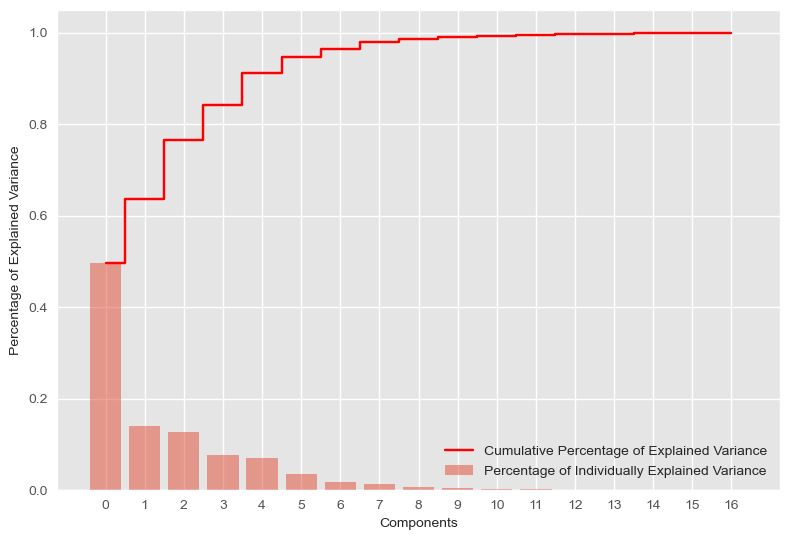

In [84]:
pve = pca.explained_variance_ratio_

# Instantiate the Cumulative Percentage of the Variance
pcve = np.cumsum(pve)

# Plot
plt.bar(range(0,len(pve)), pve, alpha=0.5, align='center', label='Percentage of Individually Explained Variance')
plt.step(range(0,len(pcve)), pcve, where='mid',label='Cumulative Percentage of Explained Variance', color='red')
plt.xticks(range(0, 17))
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

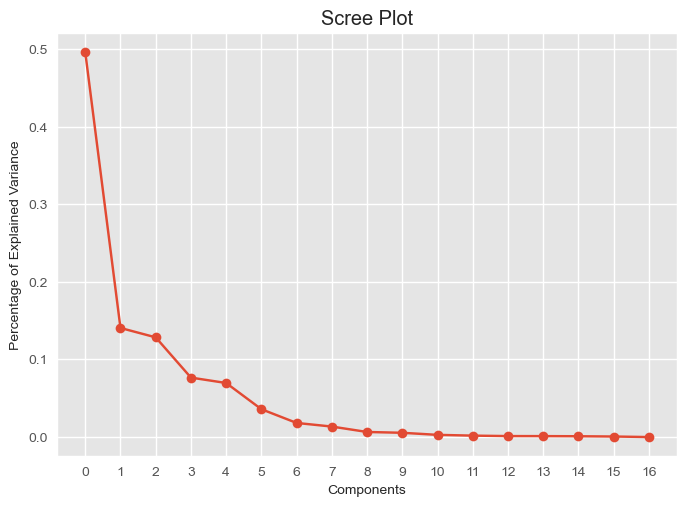

In [85]:
plt.style.use('ggplot')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show();

In [86]:
pca1 = PCA(n_components=4, random_state=18)
df_pca1 = pca1.fit_transform(df_norm)
df_pca1.shape

(8949, 4)

C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

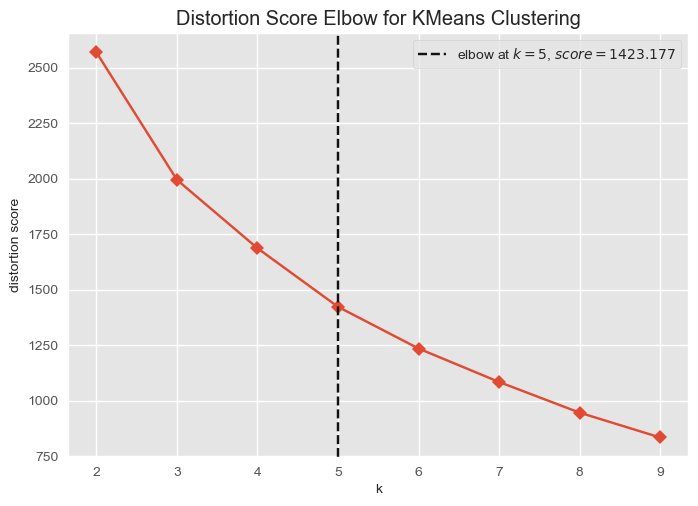

In [87]:
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

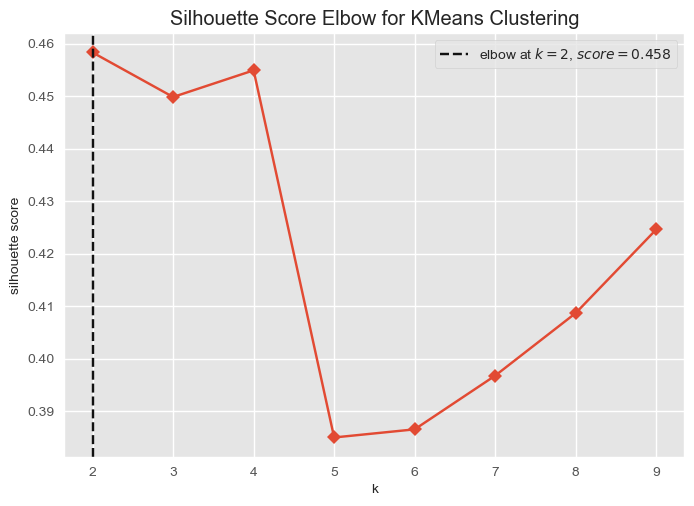

In [32]:
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


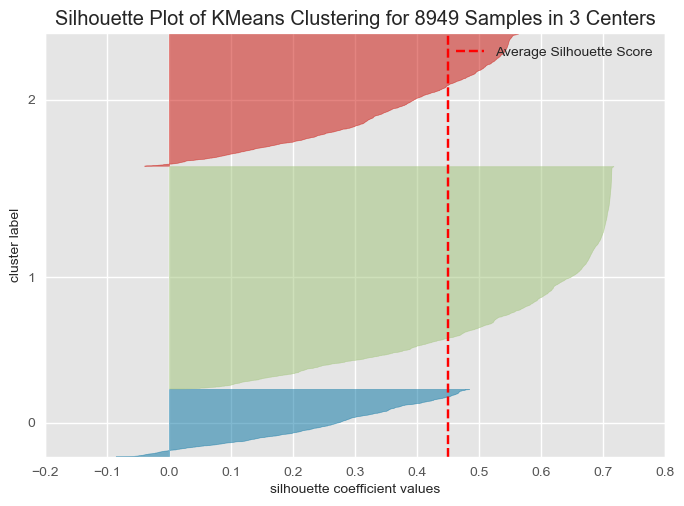

In [88]:
model = KMeans(n_clusters=3, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

In [34]:
kmeans1 = KMeans(n_clusters=2, random_state=18)
kmeans1.fit(df_pca1)
labels1 = kmeans1.labels_
# Copy of the Original Dataframe
df1 = df.copy()
# Append clusters result to Dataframe
df1['cluster'] = labels1

C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
df1['cluster'].value_counts()

1    4914
0    4035
Name: cluster, dtype: int64

In [89]:
pca2 = PCA(n_components= 2, random_state=18)
df_pca2 = pca2.fit_transform(df_norm)
df_pca2.shape



(8949, 2)

In [90]:
# K-Means Algorithm for 3 Clusters with 2 PCAs
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca2)
labels4 = kmeans2.labels_

C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
df_pca2_kmn = df_pca2.copy()
# Dataframe for two components
df_pca2_kmn = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca2_kmn = pd.concat([df_pca2_kmn, pd.DataFrame({'cluster':labels4})], axis=1)
# Table with 2 PCAs
df_pca2_kmn.head()

,pca1,pca2,cluster
0,-0.482269,-0.097884,0
1,-0.608709,-0.019549,0
2,0.304349,0.921073,2
3,-0.588699,-0.005678,0
4,-0.554502,0.052616,0


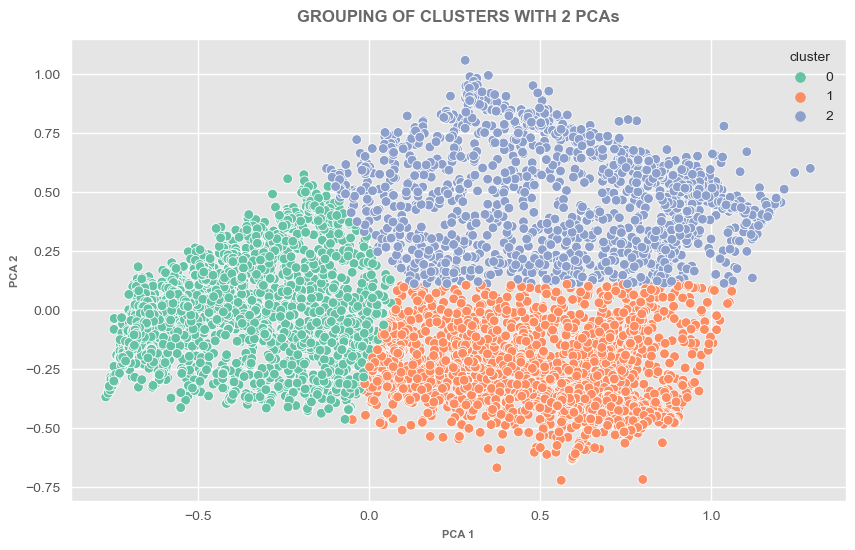

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_kmn, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [93]:
grouper_kmeans = KMeans(n_clusters = 3)
labels_kmeans = grouper_kmeans.fit_predict(df)
print("Labels K-means: ", labels_kmeans)


C:\Users\SI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels K-means:  [0 1 1 ... 0 0 0]


In [94]:
from sklearn.metrics import silhouette_score

print("The Silhouette Coefficient K-mean is:", silhouette_score(df, labels_kmeans))

The Silhouette Coefficient K-mean is: 0.46710099115266474


In [95]:
import seaborn as sns
df["cluster"] = labels_kmeans
df.groupby("cluster").describe()

BALANCE                                                                \
          count         mean          std       min          25%          50%   
cluster                                                                         
0        6539.0   856.459801   937.194670  0.000000    74.919049   536.027158   
1        2280.0  3408.857256  2851.819957  0.000000   812.780198  3030.661034   
2         130.0  4841.893262  3999.962624  4.382924  1802.504984  3453.316512   

                                   BALANCE_FREQUENCY            ...  \
                 75%           max             count      mean  ...   
cluster                                                         ...   
0        1350.193278   4931.589653            6539.0  0.854625  ...   
1        5263.500287  18495.558550            2280.0  0.940592  ...   
2        7049.972675  19043.138560             130.0  0.911252  ...   

        PRC_FULL_PAYMENT       TENURE                                        \
                     75%  max   count       mean       std  min   25%   50%   
cluster                                                                       
0               0.166667  1.0  6539.0  11.434929  1.441903  6.0  12.0  12.0   
1               0.083333  1.0  2280.0  11.737719  0.970643  6.0  12.0  12.0   
2               0.650000  1.0   130.0  11.838462  0.833447  6.0  12.0  12.0   

                     
          75%   max  
cluster              
0        12.0  12.0  
1        12.0  12.0  
2        12.0  12.0  

[3 rows x 136 columns]

In [96]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "ONEOFF_PURCHASES",
                                    "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
                                    "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY",
                                    "PURCHASES_INSTALLMENTS_FREQUENCY",
                                    "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX",
                                    "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS",
                                    "MINIMUM_PAYMENTS", "TENURE"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
cluster                                                                        
0         856.459801    605.672003        313.753930              292.216082   
1        3408.857256   1585.782588        991.280066              594.816535   
2        4841.893262  10789.305615       7619.684385             3169.790462   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                                  
0          495.514039             0.468059                    0.154590   
1         2127.523984             0.539558                    0.317189   
2         5152.220129             0.752378                    0.599535   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster                                                             
0                                0.352446                0.106754   
1                    

C:\Users\SI\AppData\Local\Temp\ipykernel_11036\3965398517.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "ONEOFF_PURCHASES",


In [97]:
description = df.groupby("cluster")["PURCHASES", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

            PURCHASES      PAYMENTS  n_clients
cluster                                       
0          605.672003    998.555885       6539
1         1585.782588   2906.493658       2280
2        10789.305615  18117.430507        130


C:\Users\SI\AppData\Local\Temp\ipykernel_11036\2445208.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["PURCHASES", "PAYMENTS"]


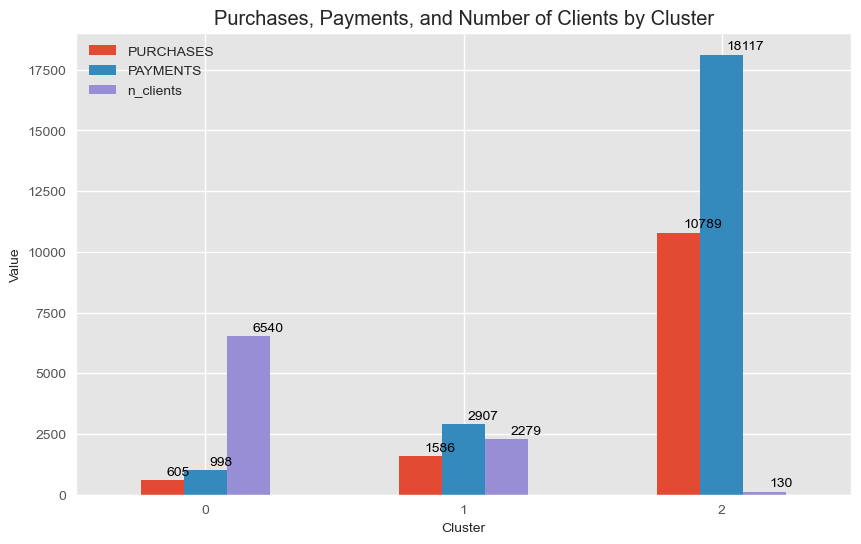

In [98]:
data = {
    'cluster': [0, 1, 2],
    'PURCHASES': [605.719852, 1586.075340, 10789.305615],
    'PAYMENTS': [998.575937, 2907.273297, 18117.430507],
    'n_clients': [6540, 2279, 130]
}

df1 = pd.DataFrame(data)
df1.set_index('cluster', inplace=True)

#ax = df.plot(kind='bar', figsize=(10, 6))
ax = df1.plot(kind='bar', figsize=(10, 6))
# Add annotations
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + 0.1, i.get_height() + 200, str(int(i.get_height())), fontsize=10, color='black')

plt.title('Purchases, Payments, and Number of Clients by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

In [102]:
description1 = df.groupby("cluster")["BALANCE", "CREDIT_LIMIT"]
n_clients = description1.size()
description1 = description1.mean()
description1['n_clients'] = n_clients
print(description1)



             BALANCE  CREDIT_LIMIT  n_clients
cluster                                      
0         856.459801   2757.000090       6539
1        3408.857256   9022.918660       2280
2        4841.893262  12465.769231        130


C:\Users\SI\AppData\Local\Temp\ipykernel_11036\1905886216.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description1 = df.groupby("cluster")["BALANCE", "CREDIT_LIMIT"]


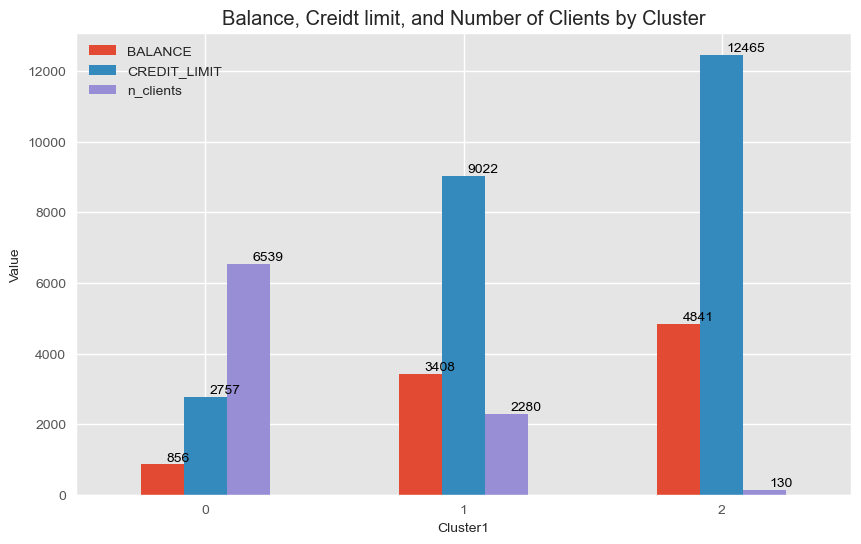

In [127]:
data = {
    'cluster1': [0, 1, 2],
    'BALANCE': [856.459801, 3408.857256, 4841.893262],
    'CREDIT_LIMIT': [2757.000090, 9022.918660, 12465.769231],
    'n_clients': [6539, 2280, 130]
}

df2 = pd.DataFrame(data)
df2.set_index('cluster1', inplace=True)

#ax = df.plot(kind='bar', figsize=(10, 6))
ax1= df2.plot(kind='bar', figsize=(10, 6))
# Add annotations
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x() + 0.1, i.get_height() + 100, str(int(i.get_height())), fontsize=10, color='black')

plt.title('Balance, Creidt limit, and Number of Clients by Cluster')
plt.xlabel('Cluster1')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

In [107]:
#DBSCAN algorithm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn import metrics


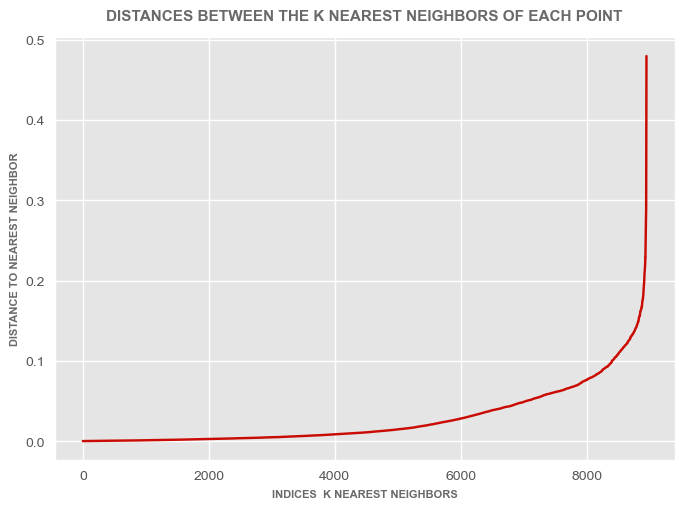

In [128]:
nbrs = NearestNeighbors(n_neighbors=2).fit(df_pca1)

# Calculating the distances and indices of the k nearest neighbors
distances, indices = nbrs.kneighbors(df_pca1)

# Plot
plt.plot(sorted(distances[:,1]), 'r-')
plt.title('DISTANCES BETWEEN THE K NEAREST NEIGHBORS OF EACH POINT', fontsize = 11, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('INDICES  K NEAREST NEIGHBORS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('DISTANCE TO NEAREST NEIGHBOR', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();


In [129]:
param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

# Create the DBSCAN object
dbscan = DBSCAN()

# Creates the GridSearchCV object
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

# Run the grid search
grid_search.fit(df_pca1)

# Displays the best parameters found
print("Best parameters found: ", grid_search.best_params_)

C:\Users\SI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 894, in check_array
    

Best parameters found:  {'eps': 0.01, 'min_samples': 2}


C:\Users\SI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\SI\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 894, in check_array
    

In [130]:
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca1)

# Getting the cluster labels
labels = dbscan.labels_ 
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 656
Estimated number of noise points: 4609


In [131]:
eps =[]
min_samples = []
silhouette = []
n_clusters = []
metrics_dbscan = []

for eps in np.linspace(0.01,0.10, num=5):
    for min_sample in range(2, 60, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_pca1)
        pred = dbscan.labels_

        silhouette = silhouette_score(df_pca1, pred)
        metrics_dbscan.append((eps, min_sample, silhouette, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(metrics_dbscan, columns=['Eps', 'Min Samples', 'Silhouette', 'Number of Clusters'])
df_dbscan.sort_values('Silhouette', ascending=False).head(10)

,Eps,Min Samples,Silhouette,Number of Clusters
55,0.1000,37,0.087634,5
56,0.1000,42,0.085500,4
12,0.0325,2,0.058058,763
59,0.1000,57,0.037098,5
53,0.1000,27,0.005888,7
46,0.0775,52,-0.052428,8
57,0.1000,47,-0.072765,4
47,0.0775,57,-0.121791,11
54,0.1000,32,-0.122732,7
13,0.0325,7,-0.130287,110


In [123]:
df_pca2_db = df_pca2.copy()
# Dataframe for two components
df_pca2_db = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca2_db = pd.concat([df_pca2_db, pd.DataFrame({'cluster':dbscan_labels})], axis=1)
# Table with 2 PCAs
df_pca2_db.head()


,pca1,pca2,cluster
0,-0.482269,-0.097884,-1
1,-0.608709,-0.019549,1
2,0.304349,0.921073,0
3,-0.588699,-0.005678,-1
4,-0.554502,0.052616,1


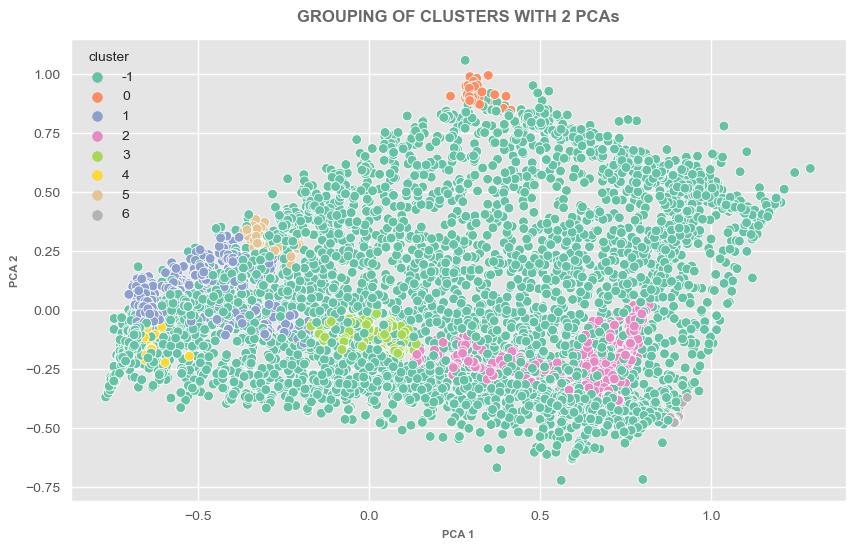

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_db, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [125]:
df_bscan = df.copy()
# Append DBSCAN clusters result to Dataframe
df_bscan['cluster'] = dbscan_labels
# Quantity of each cluster
df_bscan['cluster'].value_counts()

-1    5040
 1    2356
 2     885
 4     228
 3     180
 0      92
 5      92
 6      76
Name: cluster, dtype: int64

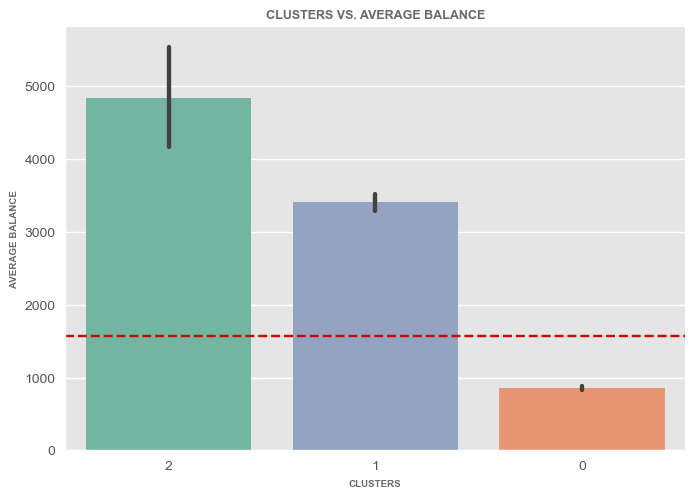

In [133]:
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['BALANCE'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE', data=df, order = df.groupby(['cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE BALANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.show()